In [1]:
import numpy as np
import pandas as pd

In [2]:
A = {'1': [23,45,67,54,34],
                '2': [12, 667444,333,9,76],
                '3': [2.75,2.5,2.5,2.5,2.5],
                '4': [334,5.3,5.3,5.3,5.4],
                '5': [1464,1394,1357,1293,1256]        
                }

gh = pd.DataFrame(A,columns=['1','2','3','4','5']) 

print (gh)

    1       2     3      4     5
0  23      12  2.75  334.0  1464
1  45  667444  2.50    5.3  1394
2  67     333  2.50    5.3  1357
3  54       9  2.50    5.3  1293
4  34      76  2.50    5.4  1256


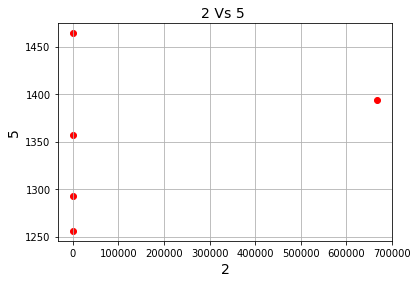

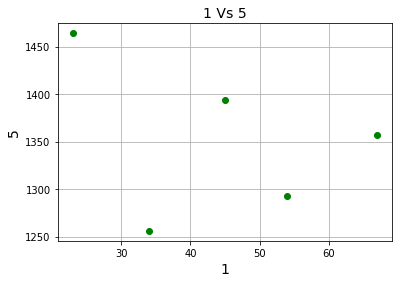

In [3]:
from pandas import DataFrame
import matplotlib.pyplot as plt



plt.scatter(gh['2'], gh['5'], color='red')
plt.title('2 Vs 5 ', fontsize=14)
plt.xlabel('2', fontsize=14)
plt.ylabel('5', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(gh['1'], gh['5'], color='green')
plt.title('1 Vs 5', fontsize=14)
plt.xlabel('1', fontsize=14)
plt.ylabel('5', fontsize=14)
plt.grid(True)
plt.show()

In [4]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d



X = gh[['2','1']]
Y = gh['5']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)



print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
New_2 = 5.1409
New_1 = 28.0367
print ('Predicted Value: \n', regr.predict([[New_2 ,New_1]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y_train, X_train).fit()
predictions = model.predict(X_train) 
 

print(model.summary())




Intercept: 
 1623.0818046603868
Coefficients: 
 [-2.26425384 -5.73525037]
Predicted Value: 
 [1450.64400798]
                                 OLS Regression Results                                
Dep. Variable:                      5   R-squared (uncentered):                   0.879
Model:                            OLS   Adj. R-squared (uncentered):              0.637
Method:                 Least Squares   F-statistic:                              3.630
Date:                Wed, 18 Dec 2019   Prob (F-statistic):                       0.348
Time:                        15:39:59   Log-Likelihood:                         -22.693
No. Observations:                   3   AIC:                                      49.39
Df Residuals:                       1   BIC:                                      47.58
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
           

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/conda/lib/python3.6/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)


In [5]:
X_train.head()

2   1
3   9  54
4  76  34
0  12  23

In [6]:
Y_train.head()

3    1293
4    1256
0    1464
Name: 5, dtype: int64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

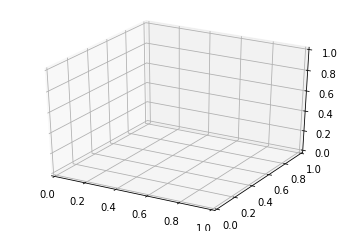

In [7]:
fig=plt.figure()
ax=plt.axes(projection="3d")
ax.scatter3D(X_train,Y_train,cmap="Green")